#### Author: Vinicio Soto, CICIMA
#### This script works with .txt files 
#### Files should be jump corrected and averaged

In [1]:
#Dependencies

import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import itertools

In [2]:
#constants
markersize = 2

### Data paths

In [3]:
#report path
report_location = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report"

#absorptance and reflectance save path
save_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data"

#code name samples path
code_name_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\CODE NAME SAMPLES.txt"

#patterns and samples

#transflectance averages
transflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average"
transmittance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSMITTANCE\transmittance\average"

In [4]:
### Create folder if not exists

In [5]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def filter_substring_elements(path_strings, substring):
    filtered_paths = [path for path in path_strings if substring in path]
    return filtered_paths

In [6]:
### List files in folder

In [7]:
import os


def list_files_in_folder(folder_path):
    files_only_in_folder = []
    
    # Get the list of all files in the folder and its subfolders
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            all_files.append(os.path.join(root, file))
    
    # Get the list of files that are only in the top-level folder
    for file in all_files:
        if os.path.isfile(file) and os.path.dirname(file) == folder_path:
            files_only_in_folder.append(file)
    
    return files_only_in_folder

transflectance_file_list_general = list_files_in_folder(transflectance_data_path)
transmittance_file_list_general = list_files_in_folder(transmittance_data_path)
#std_dev_file_list
#transmittance_file_list_general

### Dataframe List

In [8]:
transmittance_dataframes = []
absorptance_dataframes = []
reflectance_dataframes = []
transflectance_dataframes = []

### Absorptance

In [9]:
#read codes
codes_df = pd.read_csv(code_name_path, sep="	",header=0,  
                     names=["code", "description"]) 
codes_df

,code,description
0,C.KALI.LA22,CHRYSINA KALININI LA AMISTAD 2022
1,C.RESP.MV23,C. RESPLENDENS MV 23-19
2,C.CUPR.MV23,C. CUPREOMARGINATA MV 23-15
3,C.AURI.INBI,C. AURIGANS INBIO DESCABEZADO
4,C.CHRY.6713,C. CHRYSARGYREA INBIOCRI002426713
5,C.OPTI.8.17,C. OPTIMA #81 7 SIGNO PREGUNTA
6,C.CHRY.MV73,C. CHRYSARGYREA #73 MV23
7,C.CHRY.MV84,C. CHRYSARGYREA #84 MV23
8,S.BELT.1063,STRIGIDIA BELTI INBIO0004211063
9,S.GLAB.0620,STRIGIDIA GLABRA INBIOCRI0003420620


In [10]:
#print(file)

### Reflectance

C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average\C.KALI.LA22_AVERAGE.txt
C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSMITTANCE\transmittance\average\C.KALI.LA22_AVERAGE.txt
*****
reflectance.file
C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average\C.KALI.LA22_AVERAGE.txt
      wavelength  transflectance         code
5          255.0        5.753851  C.KALI.LA22
6          256.0        5.721774  C.KALI.LA22
7          257.0        5.695559  C.KALI.LA22
8          258.0        5.676867  C.KALI.LA22
9          259.0        5.658812  C.KALI.LA22
...          ...             ...          ...
1746      1996.0       73.548358  C.KALI.LA22
1747      1997.0       73.940907  C.KALI.LA22
1748      1998.0       74.335014  C.KALI.LA22
1749      1999.0       74.443687  C.KALI.LA22
1750      2000.0       74.670560  C.KALI.LA22

[1746 rows x 3 

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

      wavelength  transflectance         code
5          255.0        6.060476  C.CHRY.6713
6          256.0        6.038712  C.CHRY.6713
7          257.0        6.016479  C.CHRY.6713
8          258.0        5.992391  C.CHRY.6713
9          259.0        5.954435  C.CHRY.6713
...          ...             ...          ...
1746      1996.0       66.853082  C.CHRY.6713
1747      1997.0       66.940693  C.CHRY.6713
1748      1998.0       67.177444  C.CHRY.6713
1749      1999.0       67.193573  C.CHRY.6713
1750      2000.0       67.120558  C.CHRY.6713

[1746 rows x 3 columns]
      wavelength  transmittance         code
5          255.0       0.261577  C.CHRY.6713
6          256.0       0.260461  C.CHRY.6713
7          257.0       0.260374  C.CHRY.6713
8          258.0       0.258340  C.CHRY.6713
9          259.0       0.257794  C.CHRY.6713
...          ...            ...          ...
1746      1996.0      42.232424  C.CHRY.6713
1747      1997.0      42.249750  C.CHRY.6713
1748      1998.0  

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

      wavelength  transflectance         code
5          255.0        7.746911  S.SIGN.PREG
6          256.0        7.720464  S.SIGN.PREG
7          257.0        7.695639  S.SIGN.PREG
8          258.0        7.678208  S.SIGN.PREG
9          259.0        7.672222  S.SIGN.PREG
...          ...             ...          ...
1746      1996.0       84.323226  S.SIGN.PREG
1747      1997.0       84.132393  S.SIGN.PREG
1748      1998.0       84.210789  S.SIGN.PREG
1749      1999.0       84.164929  S.SIGN.PREG
1750      2000.0       84.082250  S.SIGN.PREG

[1746 rows x 3 columns]
      wavelength  transmittance         code
5          255.0       0.456638  S.SIGN.PREG
6          256.0       0.456875  S.SIGN.PREG
7          257.0       0.456188  S.SIGN.PREG
8          258.0       0.456671  S.SIGN.PREG
9          259.0       0.457112  S.SIGN.PREG
...          ...            ...          ...
1746      1996.0      63.463766  S.SIGN.PREG
1747      1997.0      63.474121  S.SIGN.PREG
1748      1998.0  

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

reflectance.file
C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average\C.BOUC.CO23_AVERAGE.txt
      wavelength  transflectance         code
5          255.0        6.509288  C.BOUC.CO23
6          256.0        6.480419  C.BOUC.CO23
7          257.0        6.451632  C.BOUC.CO23
8          258.0        6.438719  C.BOUC.CO23
9          259.0        6.416509  C.BOUC.CO23
...          ...             ...          ...
1746      1996.0       79.328273  C.BOUC.CO23
1747      1997.0       79.291198  C.BOUC.CO23
1748      1998.0       79.670815  C.BOUC.CO23
1749      1999.0       79.646428  C.BOUC.CO23
1750      2000.0       79.651330  C.BOUC.CO23

[1746 rows x 3 columns]
      wavelength  transmittance         code
5          255.0       0.318631  C.BOUC.CO23
6          256.0       0.310493  C.BOUC.CO23
7          257.0       0.307474  C.BOUC.CO23
8          258.0       0.303191  C.BOUC.CO23
9          259.0       0.299887  C.BOUC.CO23

      wavelength  transflectance            code
5          255.0        6.279243  C.BOUC.INB5610
6          256.0        6.234452  C.BOUC.INB5610
7          257.0        6.203099  C.BOUC.INB5610
8          258.0        6.179720  C.BOUC.INB5610
9          259.0        6.150457  C.BOUC.INB5610
...          ...             ...             ...
1746      1996.0       65.447755  C.BOUC.INB5610
1747      1997.0       65.607544  C.BOUC.INB5610
1748      1998.0       65.783041  C.BOUC.INB5610
1749      1999.0       65.776963  C.BOUC.INB5610
1750      2000.0       65.757225  C.BOUC.INB5610

[1746 rows x 3 columns]
      wavelength  transmittance            code
5          255.0       0.203556  C.BOUC.INB5610
6          256.0       0.202905  C.BOUC.INB5610
7          257.0       0.204641  C.BOUC.INB5610
8          258.0       0.207576  C.BOUC.INB5610
9          259.0       0.212184  C.BOUC.INB5610
...          ...            ...             ...
1746      1996.0      41.359007  C.BOUC.INB5610
174

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_33996\456827627.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reflectance_df["code"] = code


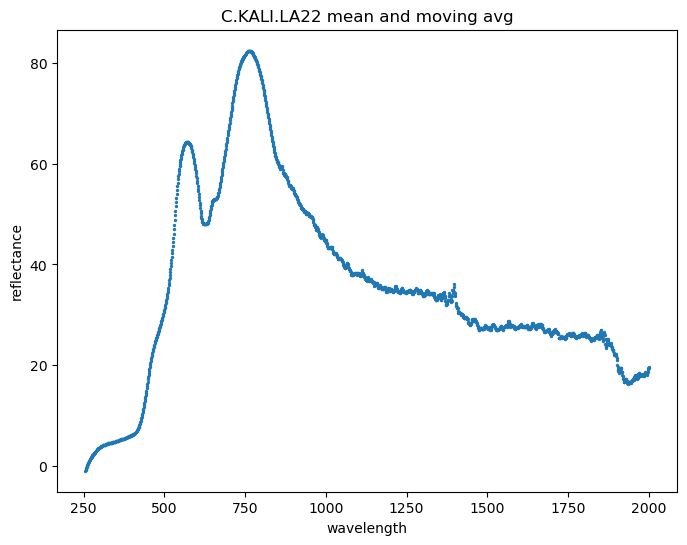

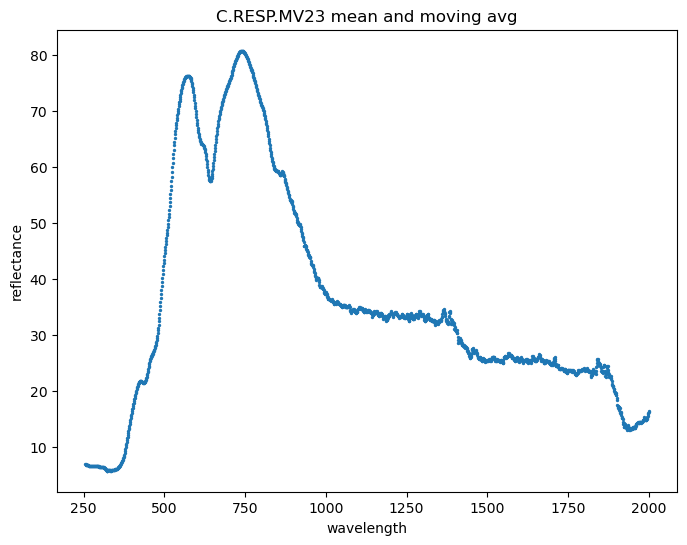

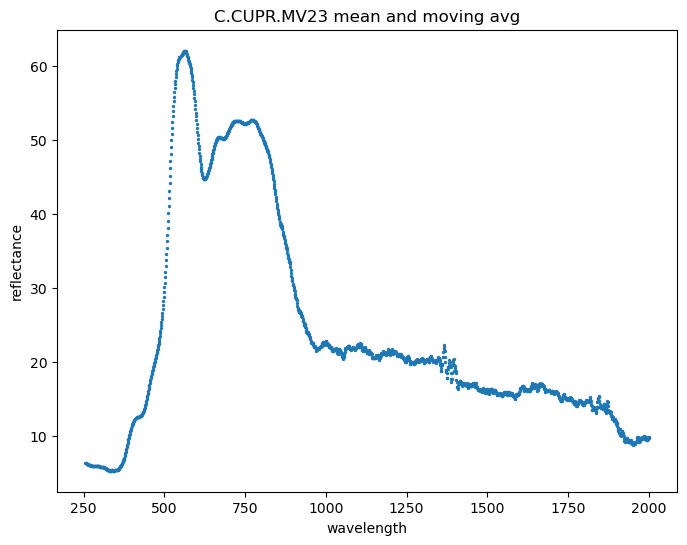

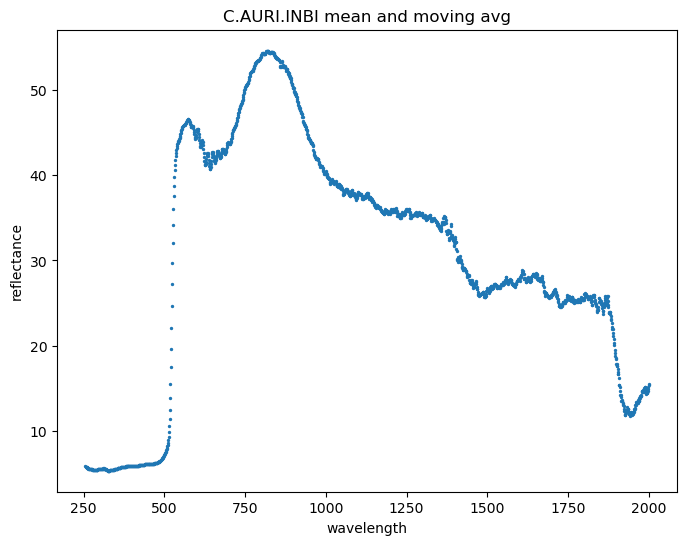

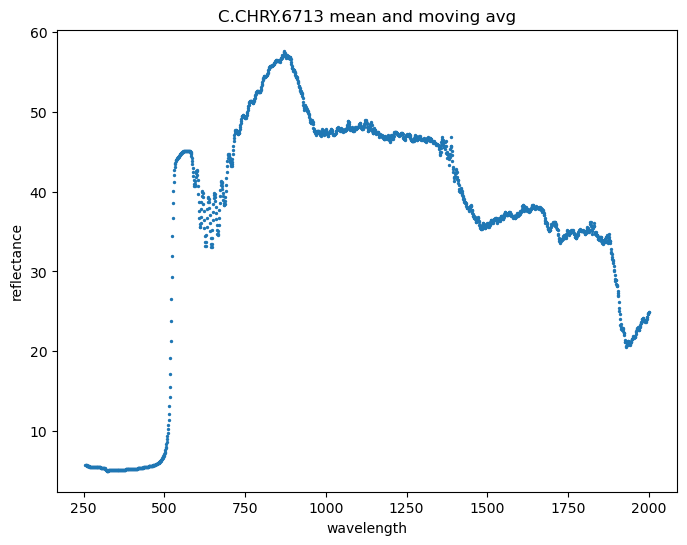

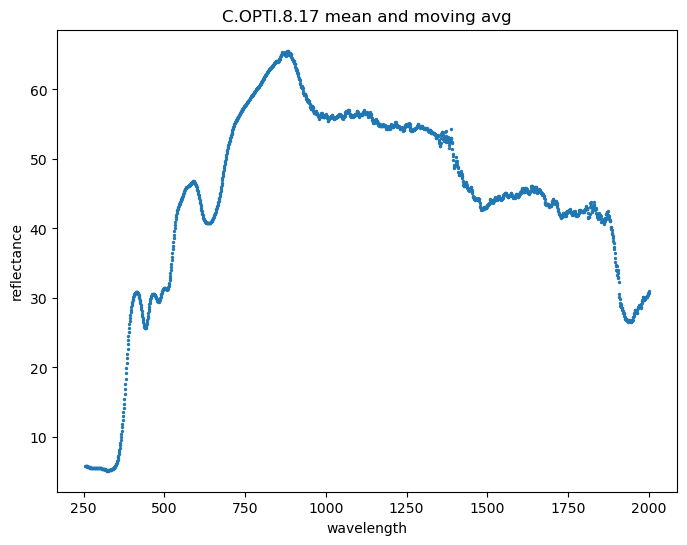

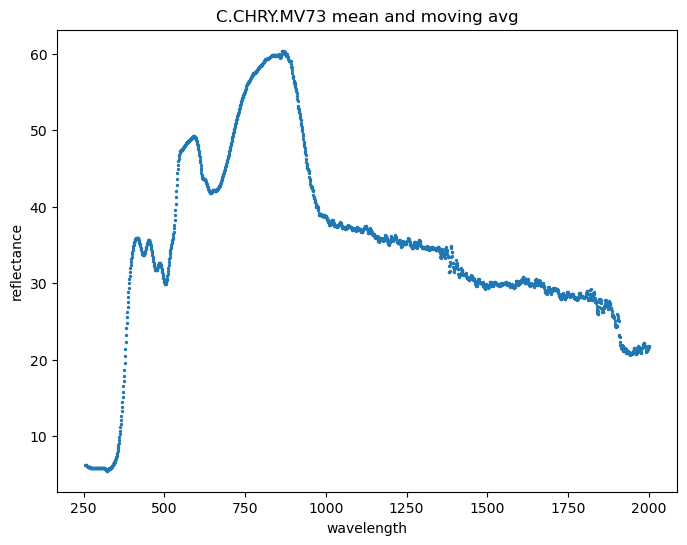

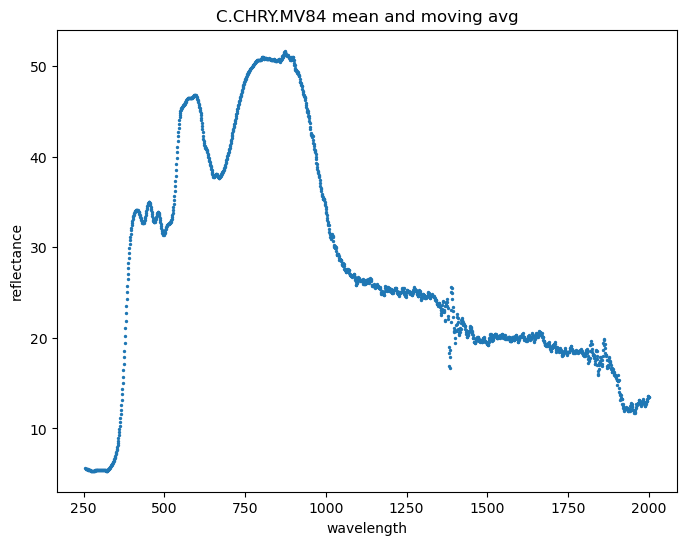

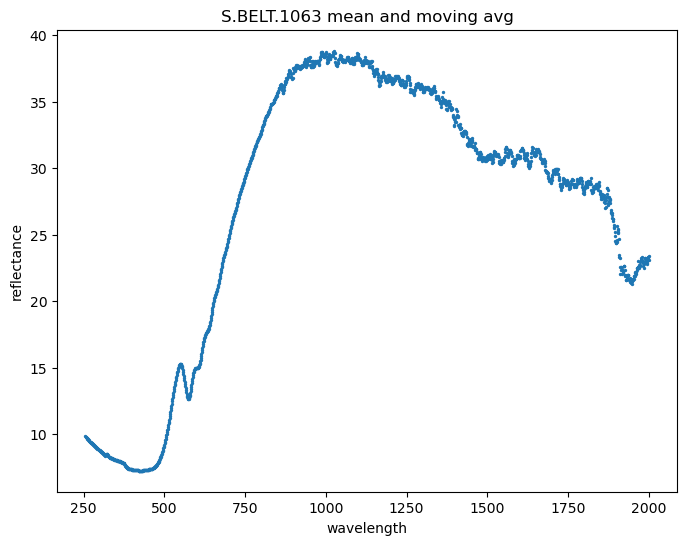

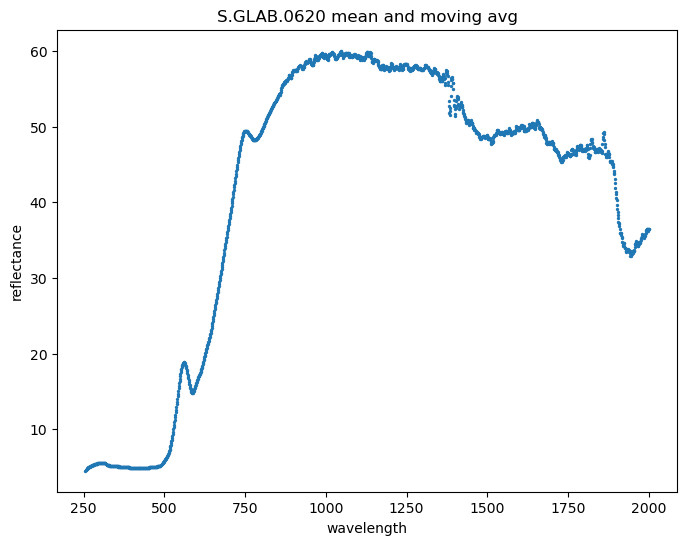

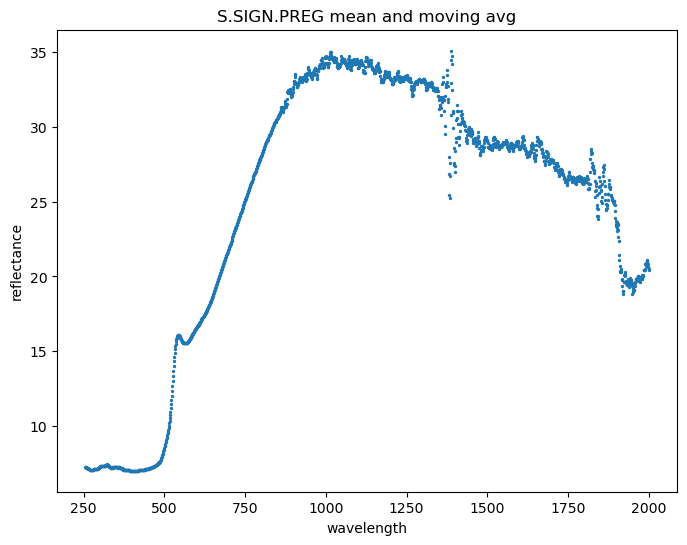

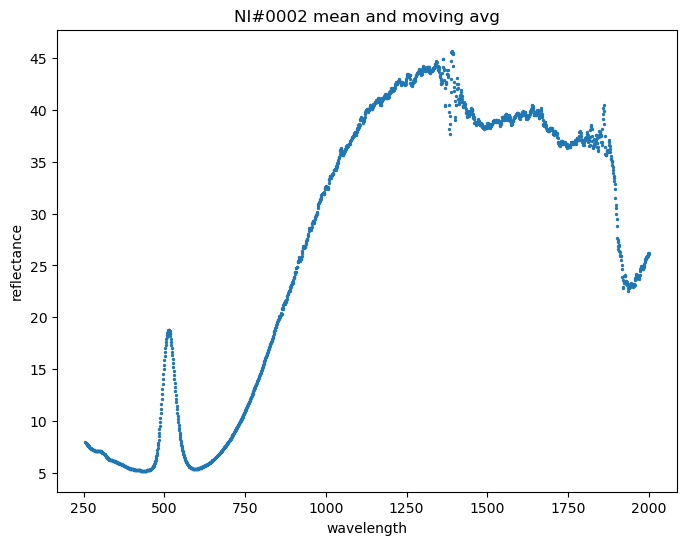

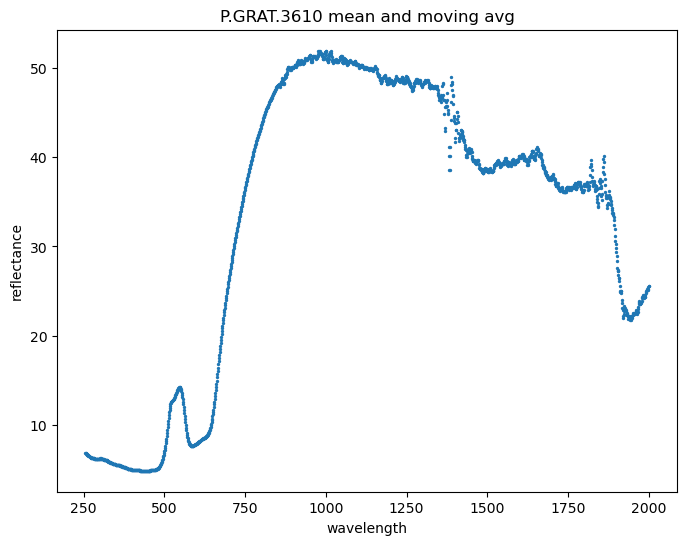

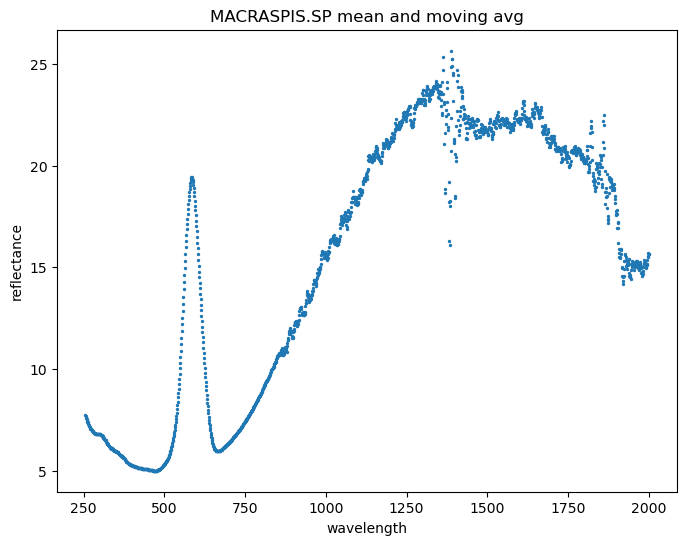

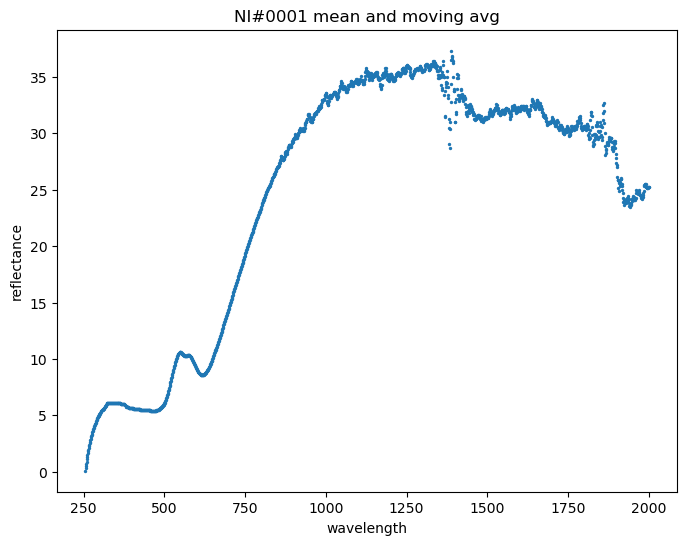

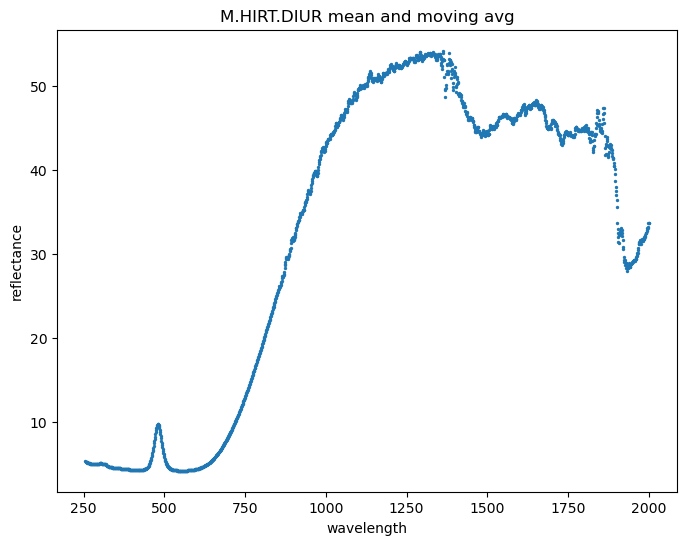

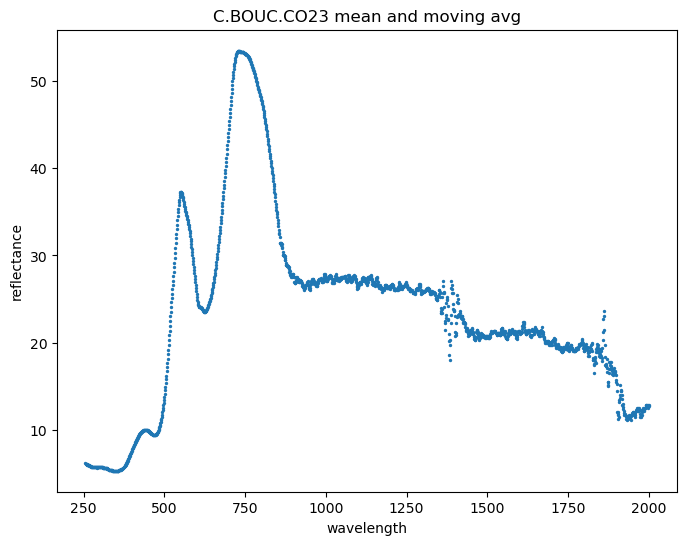

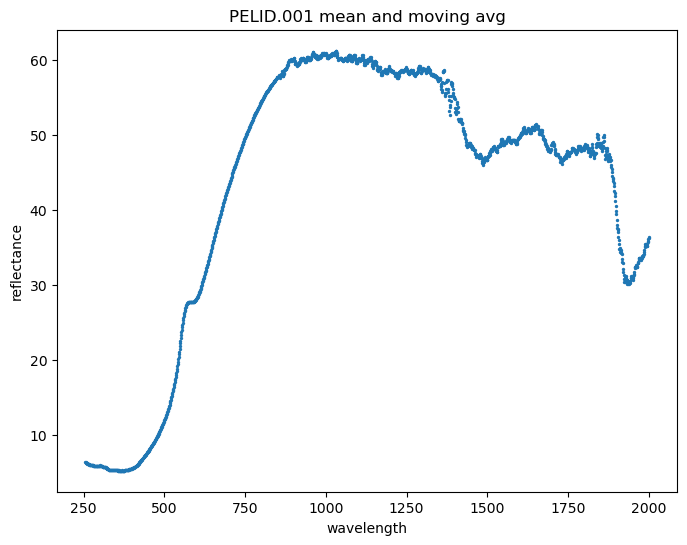

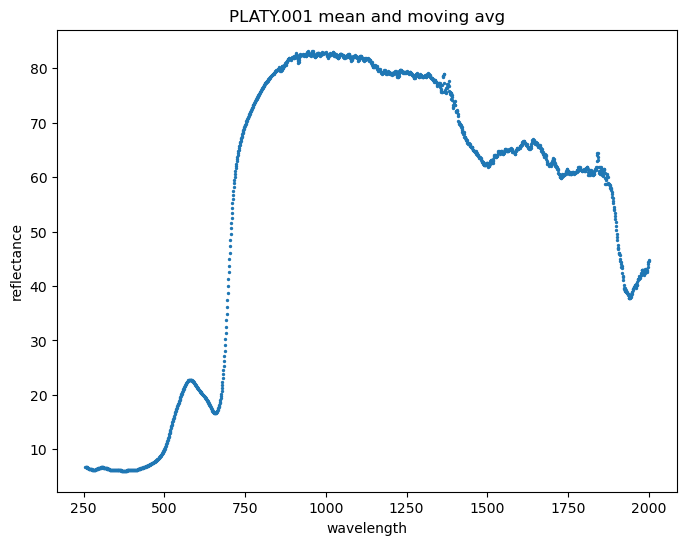

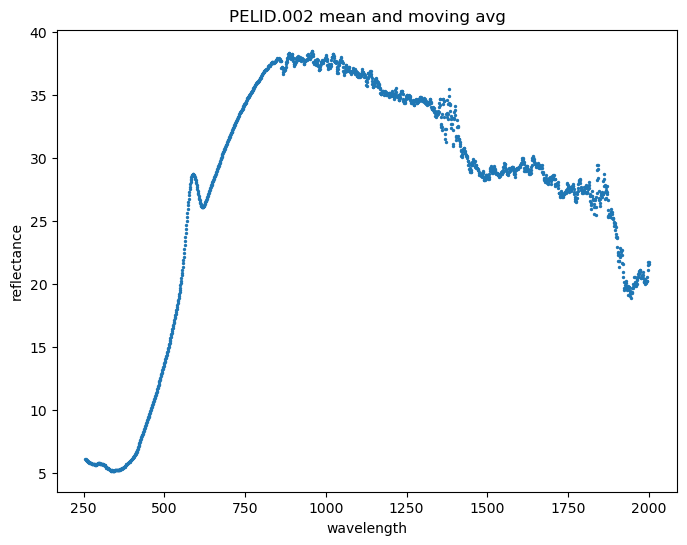

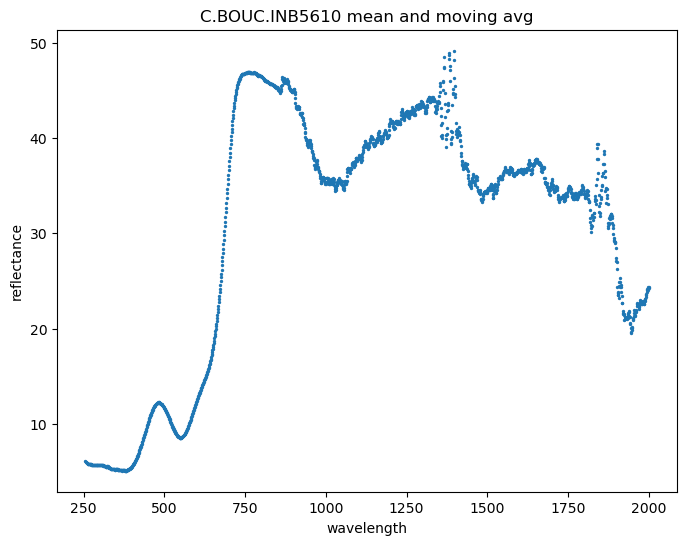

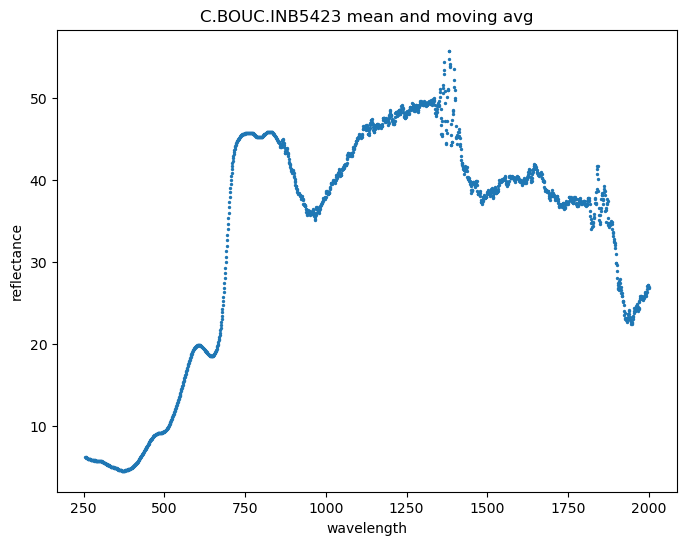

In [11]:
for code in codes_df["code"]:
    transflectance_file_list_filtered = filter_substring_elements(transflectance_file_list_general, code)
    transmittance_file_list_filtered = filter_substring_elements(transmittance_file_list_general, code)
    #print("len")
    #print(len(transflectance_file_list_filtered))
    #print(len(transmittance_file_list_filtered))
    for file1 in transflectance_file_list_filtered:
        for file2 in transmittance_file_list_filtered:
                
                print(file1)
                print(file2)
                print("*****")
                transflectance_df = pd.read_csv(file1, sep="	",header=None, names=["wavelength", "transflectance"]).dropna()
                transflectance_df = transflectance_df[transflectance_df['wavelength'] <= 2000]
                transflectance_df.loc[transflectance_df['transflectance'] > 100, 'transflectance'] = 100
                transflectance_dataframes.append(transflectance_df)
                transflectance_df["code"] = code
                transmittance_df  = pd.read_csv(file2, sep="	",header=None, names=["wavelength", "transmittance"]).dropna()
                transmittance_df = transmittance_df[transmittance_df['wavelength'] <= 2000]
                transmittance_df.loc[transmittance_df['transmittance'] > 100, 'transmittance'] = 100
                transmittance_df["code"] = code
                transmittance_dataframes.append(transmittance_df)
                
                
                #print(transflectance_df)
                #print(transmittance_df)
                # Merge the two DataFrames on 'Wavelength' column
                merged_df = pd.merge(transflectance_df, transmittance_df, on='wavelength')
                
                #print("merged")
                #print(merged_df)
                # Subtract 'transmittance' from 'Transflectance' and create a new column 'Subtracted_Value'
                merged_df['reflectance'] = merged_df['transflectance'] - merged_df['transmittance']
                
                
                #Calculate absorptance
                absorptance_df = pd.DataFrame([])
                absorptance_df["wavelength"] = transflectance_df["wavelength"]
                absorptance_df["absorptance"] = 100 - transflectance_df["transflectance"]
                absorptance_df["code"] = code
                absorptance_dataframes.append(absorptance_df)
                #print("absorptance")
                #print(absorptance_df)
                
                # Create a new DataFrame with 'Wavelength' and 'Subtracted_Value' columns
                reflectance_df = merged_df[['wavelength', 'reflectance']]
                reflectance_df.file = file1
                reflectance_df.code = code
                reflectance_df["code"] = code
                print("reflectance.file")
                print(reflectance_df.file)
                reflectance_dataframes.append(reflectance_df)
                
                
                reflectance_df.plot(x='wavelength', y='reflectance', kind='scatter', s=markersize, title = code + " mean and moving avg", figsize = (8, 6))
                #plt.show()
                #print(reflectance_df)
                
                #saves files
                
                #reflectance 
                
                corrected_path = save_path +"\\" + "reflectance\\"

                if not os.path.exists(corrected_path):
                    os.mkdir(corrected_path)

                new_filename = code +"-RX.txt"
                reflectance_numpy = reflectance_df.to_numpy()
                new_archive_name = corrected_path + new_filename
                np.savetxt(new_archive_name, reflectance_numpy,fmt='%s', delimiter="\t")
                
                #transmittance 
                
                corrected_path = save_path +"\\" + "transmittance\\"

                if not os.path.exists(corrected_path):
                    os.mkdir(corrected_path)

                new_filename = code +"-TX.txt"
                transmittance_numpy = transmittance_df.to_numpy()
                new_archive_name = corrected_path + new_filename
                np.savetxt(new_archive_name, transmittance_numpy,fmt='%s', delimiter="\t")
                
                #absorptance 
                
                corrected_path = save_path +"\\" + "absorptance\\"

                if not os.path.exists(corrected_path):
                    os.mkdir(corrected_path)

                new_filename = code +"-AX.txt"
                absorptance_numpy = absorptance_df.to_numpy()
                new_archive_name = corrected_path + new_filename
                np.savetxt(new_archive_name, absorptance_numpy,fmt='%s', delimiter="\t")
                
                #transflectance 
                
                corrected_path = save_path +"\\" + "transflectance\\"

                if not os.path.exists(corrected_path):
                    os.mkdir(corrected_path)

                new_filename = code +"-TXRX.txt"
                transflectance_numpy = transflectance_df.to_numpy()
                new_archive_name = corrected_path + new_filename
                np.savetxt(new_archive_name, transflectance_numpy,fmt='%s', delimiter="\t")
                
                
                
                print(transflectance_df)
                print(transmittance_df)
                print(reflectance_df)
                print(absorptance_df)

            

In [12]:
absorptance_dataframes

[      wavelength  absorptance         code
 5          255.0    94.246149  C.KALI.LA22
 6          256.0    94.278226  C.KALI.LA22
 7          257.0    94.304441  C.KALI.LA22
 8          258.0    94.323133  C.KALI.LA22
 9          259.0    94.341188  C.KALI.LA22
 ...          ...          ...          ...
 1746      1996.0    26.451642  C.KALI.LA22
 1747      1997.0    26.059093  C.KALI.LA22
 1748      1998.0    25.664986  C.KALI.LA22
 1749      1999.0    25.556313  C.KALI.LA22
 1750      2000.0    25.329440  C.KALI.LA22
 
 [1746 rows x 3 columns],
       wavelength  absorptance         code
 5          255.0    92.777358  C.RESP.MV23
 6          256.0    92.804088  C.RESP.MV23
 7          257.0    92.836169  C.RESP.MV23
 8          258.0    92.863644  C.RESP.MV23
 9          259.0    92.875030  C.RESP.MV23
 ...          ...          ...          ...
 1746      1996.0    27.195568  C.RESP.MV23
 1747      1997.0    26.778653  C.RESP.MV23
 1748      1998.0    26.487744  C.RESP.MV23
 174

In [13]:
create_folder_if_not_exists(report_location)
counterA = 1
counterB = 0
with matplotlib.backends.backend_pdf.PdfPages(report_location + "\\" + 'optical info.pdf') as pdf:
    counterB = 0
    
    for dataframe in absorptance_dataframes:
        #print(dataframe)
        counterB = counterB +1
        avg_plot = dataframe.plot(x='wavelength', y='absorptance', kind='scatter', s=markersize, title = f"Figure {counterA}.{counterB} " + (dataframe["code"].iloc[0]) + " ", figsize = (8, 6), grid= True)
        avg_plot.set_xlabel("Wavelength [nm] ")
        avg_plot.set_ylabel("absorptance [%]")
        #save figures
        pdf.savefig()
        #close plot
        plt.close()
    
    counterA = 2
    counterB = 0
    
    for dataframe in transmittance_dataframes:
        counterB = counterB +1
        #print(dataframe["code"])
        #print(dataframe.file)
        avg_plot = dataframe.plot(x='wavelength', y='transmittance', kind='scatter', s=markersize, title = f"Figure {counterA}.{counterB} " + (dataframe["code"].iloc[0]) + " ", figsize = (8, 6), grid= True)
        avg_plot.set_xlabel("Wavelength [nm] ")
        avg_plot.set_ylabel("transmittance [%]")
        #save figures
        pdf.savefig()
        #close plot
        plt.close()
    
    counterA = 3
    counterB = 0
    
    for dataframe in reflectance_dataframes:
        counterB = counterB +1
        #print(dataframe.file)
        avg_plot = dataframe.plot(x='wavelength', y='reflectance', kind='scatter', s=markersize, title = f"Figure {counterA}.{counterB} " + (dataframe["code"].iloc[0]) + " ", figsize = (8, 6), grid= True)
        avg_plot.set_xlabel("Wavelength [nm] ")
        avg_plot.set_ylabel("reflectance [%]")
        #save figures
        pdf.savefig()
        #close plot
        plt.close()
        
    counterA = 4
    counterB = 0
    
    for dataframe in transflectance_dataframes:
        counterB = counterB +1
        #print(dataframe.file)
        avg_plot = dataframe.plot(x='wavelength', y='transflectance', kind='scatter', s=markersize, title = f"Figure {counterA}.{counterB} " + (dataframe["code"].iloc[0]) + " ", figsize = (8, 6), grid= True)
        avg_plot.set_xlabel("Wavelength [nm] ")
        avg_plot.set_ylabel("transflectance [%]")
        #save figures
        pdf.savefig()
        #close plot
        plt.close()



Folder 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report' already exists.
